In [121]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("./datasets/Iris.csv", index_col='Id')

In [122]:
x = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = data['Species']
x_train, x_test, y_train, y_test = train_test_split(x, y)
x_train_scaled = StandardScaler().fit_transform(x_train)
x_test_scaled = StandardScaler().fit_transform(x_test)

N_clusters =  2  | Average silhouette =  0.5893035718232185
N_clusters =  3  | Average silhouette =  0.44291691141491907
N_clusters =  4  | Average silhouette =  0.43258656549736
N_clusters =  5  | Average silhouette =  0.36139389802497257
N_clusters =  6  | Average silhouette =  0.3050454070405736
N_clusters =  7  | Average silhouette =  0.32301900743548223
N_clusters =  8  | Average silhouette =  0.32753360388108843
N_clusters =  9  | Average silhouette =  0.31576980150200196
N_clusters =  10  | Average silhouette =  0.3136308571815874
N_clusters =  11  | Average silhouette =  0.3346660149816008
N_clusters =  12  | Average silhouette =  0.33464633402737326
N_clusters =  13  | Average silhouette =  0.35000540854245277
N_clusters =  14  | Average silhouette =  0.3497520766164482
N_clusters =  15  | Average silhouette =  0.33887647540188276
N_clusters =  16  | Average silhouette =  0.32930722619651626
N_clusters =  17  | Average silhouette =  0.30619847077454715
N_clusters =  18  | Aver

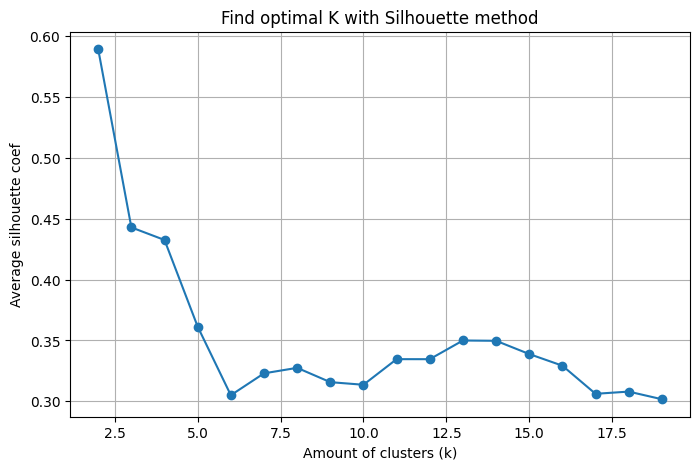

In [123]:
cluster_range = range(2,20)
avg_scores = []
for n_cluster in cluster_range:
    clusterer = KMeans(n_clusters=n_cluster, random_state=0)
    cluster_labels = clusterer.fit_predict(x_train_scaled)
    silhouette_average = silhouette_score(x_train_scaled, cluster_labels)
    print('N_clusters = ', n_cluster, ' | Average silhouette = ', silhouette_average)
    avg_scores.append(silhouette_average)
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, avg_scores, marker='o')
plt.title('Find optimal K with Silhouette method')
plt.xlabel('Amount of clusters (k)')
plt.ylabel('Average silhouette coef')
plt.grid(True)
plt.show()

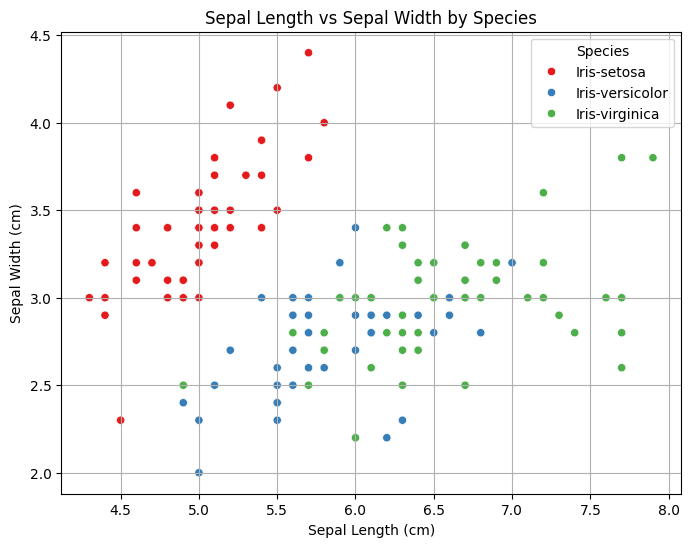

In [124]:
#Based on the silhouette method, I have to select 2 clusters, but in my opinion there should be 3 clusters. 
#Maybe I used the silhouette method incorrectly
clf = KMeans(n_clusters=3)
clf.fit(x_train_scaled, y_train)
data['cluster'] = clf.fit_predict(x)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='SepalLengthCm', y='SepalWidthCm', hue='Species', palette='Set1')
plt.title('Sepal Length vs Sepal Width by Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species')
plt.grid(True)
plt.show()

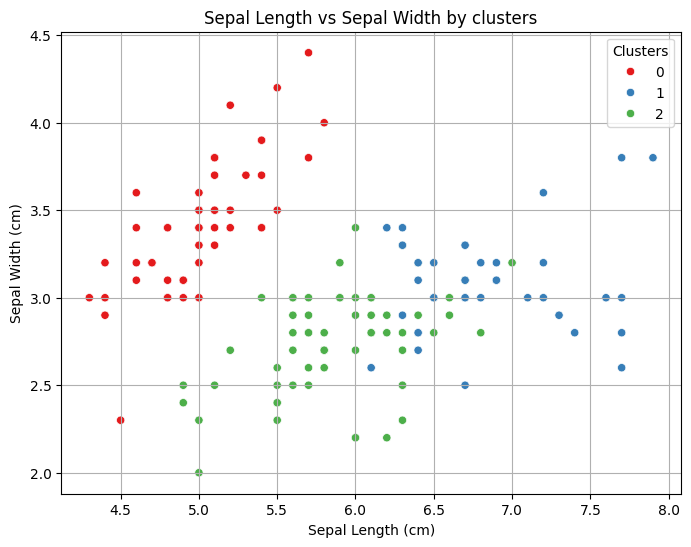

In [125]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='SepalLengthCm', y='SepalWidthCm', hue='cluster', palette='Set1')
plt.title('Sepal Length vs Sepal Width by clusters')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Clusters')
plt.grid(True)
plt.show()